In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib import units
from tensorflow.keras.optimizers import Adam
import os
from glob import glob
import shutil
import time
from IPython.display import clear_output
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import shutil
import PIL
from tensorflow.keras import layers
AUTOTUNE = tf.data.AUTOTUNE

In [2]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import ipyplot

In [124]:
import random
np.round(random.uniform(0,1))


0.0

In [125]:
def aug_img(input):
    hflip= iaa.Fliplr(p=.5)
    vflip= iaa.Flipud(p=0.5) 
    rot1 = iaa.Affine(rotate=(-180,180))
    crop1 = iaa.Crop(percent=(0, 0.2)) 
    shear = iaa.Affine(shear=(-20,20))
    noise=iaa.AdditiveGaussianNoise(10,10)
    contrast=iaa.GammaContrast((0.1, 2.0))
    contrast_sig = iaa.SigmoidContrast(gain=(1, 10), cutoff=(0.4, 0.6))
    contrast_lin = iaa.LinearContrast((0.6, 0.4))
    
    input= hflip.augment_image(input)
    input= vflip.augment_image(input)
    input= rot1.augment_image(input)
    input = crop1.augment_image(input) if np.round(random.uniform(0,1)) == 1.0 else input
    input=noise.augment_image(input) if np.round(random.uniform(0,1)) == 1.0 else input
    input=shear.augment_image(input) if np.round(random.uniform(0,1)) == 1.0 else input
    input= contrast.augment_image(input) if np.round(random.uniform(0,1)) == 1.0 else input
    input = contrast_sig.augment_image(input) if np.round(random.uniform(0,1)) == 1.0 else input
    input = contrast_lin.augment_image(input) if np.round(random.uniform(0,1)) == 1.0 else input
    return input
    

C:\Users\nuttanont_naranong\AppData\Local\Temp\ipykernel_15964\2315406238.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  input_img = imageio.imread(img_paths[ind])



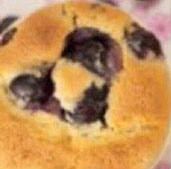
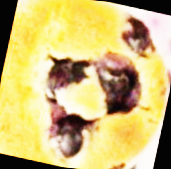


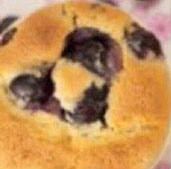
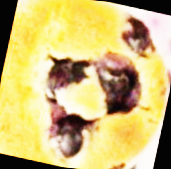

In [160]:
import random
img_paths = glob('./chihuahuamuffin/deep-learning-datasets-master/chihuahua-muffin/chihuahua/*')
ind=int(random.random()*len(img_paths)-1)
input_img = imageio.imread(img_paths[ind])
img_out=aug_img(input_img)
images_list=[input_img, img_out]
labels = ['Original', 'Aug Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

In [162]:
from PIL import Image
im = Image.fromarray(img_out)
im.save('./chihuahuamuffin/deep-learning-datasets-master/chihuahua-muffinTrain/muffin/{}.jpeg'.format("asd"))

In [171]:
img_paths = glob('./chihuahuamuffin/deep-learning-datasets-master/chihuahua-muffin/muffin/*')
i=0
while True :
    i+=1
    ind=int(random.random()*len(img_paths)-1)
    input_img = imageio.imread(img_paths[ind])
    img_out=aug_img(input_img)
    im = Image.fromarray(img_out)
    im.save('./chihuahuamuffin/deep-learning-datasets-master/chihuahua-muffinTrain/muffin/{}.jpeg'.format(i))
    if len(glob('./chihuahuamuffin/deep-learning-datasets-master/chihuahua-muffinTrain/muffin/*')) >=1000:
        break
    

C:\Users\nuttanont_naranong\AppData\Local\Temp\ipykernel_15964\1886371877.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  input_img = imageio.imread(img_paths[ind])


1000